# MPSlib: hard and soft data in MPSlib

MPSlib can account for hard and soft data (both colocated and no-colocated). Detail about the use of the preferential path and co- and non-co-located soft data can be found in 

[Hansen, Thomas Mejer, Klaus Mosegaard, and Knud Skou Cordua. "Multiple point statistical simulation using uncertain (soft) conditional data." Computers & geosciences 114 (2018): 1-10](https://doi.org/10.1016/j.cageo.2018.01.017)


`mps_snesim_tree` and `mps_snesim_list` can account for both colocated soft data only.

`mps_genesim`can account for both colocated and non-colocated soft data.


## Define hard data

Hard data (model parameyers with no uncertainty) are given by the '''d_hard''' variable, with X, Y, Z, and VALUE for each conditonal data. 3 conditional hard data can be given by

    O.d_hard = np.array(  [[ ix1, iy1, iz1, val1],
                           [ ix2, iy2, iz2, val2],
                           [ ix3, iy3, iz3, val3]])
                           
## Define soft/uncertain data

Soft data (model parametrs wth no uncertainty) are given by the '''d_soft variable, with X, Y, Z, for the position, and a probability of each possible outcome. When considering a training with two categories [0,1], then with P(m=0)=0.2, at position [5,3,2] can be set as

    O.d_soft = np.array(  [[ 5, 3, 2, 0.2 0.8]])
    
If a training image has 3 categories and P(m=0)=0.2, and P(m=1)=0.3, then     

    O.d_soft = np.array(  [[ 5, 3, 2, 0.2, 0.4, 0.5]])
    
                                                      
## Preferential path

MPSlib makes use of a preferential simulation path, such that model parameters with more informed conditional information (i.e. wigh lower entropy) prior to less nodes with less informed conditonal information.
Especially when using spare soft data, the use of a preferential path should be preferred

    O.par['shuffle_simulation_grid']=0 # Unilateral path
    O.par['shuffle_simulation_grid']=1 # Random path
    O.par['shuffle_simulation_grid']=2 # Preferential path

### co-located soft data
By default only co-located soft data are considered during simulation, as given by 

    O.par['n_cond_soft']=1 # only 1 soft data is used
    O.par['max_search_radius_soft'] = 0 # only co-located soft data us used
    O.par['shuffle_simulation_grid']= 2 # Preferential path

Whenever using only co-locate soft data is is adviced to use the preferential path

### non-co-located soft data.
Even when using the preferential path, model parameters with informed conditional indformation, close to the point being simulated, will not be taken into account. This means in practice that not all information in soft conditional data is used. As an alternative 
'mps_genesim' can handle non-colocated soft data, by using a rejection sample to accept a proposed match m* from scannining the TI, with a probability proprtional to the product of the condtional information evalauted in m*.

This means that one can account for, in principle, any number of soft data, as one can account for any number of hard data. In practice, it becomes computationally har to account for many soft data. To set the number of soft data used for conditining to 3, on can use

    O.par['n_cond_soft']=3
    O.par['max_search_radius_soft'] = 10000000 # only co-located soft data us used
    O.par['shuffle_simulation_grid']=2  # Preferential path
    
When using multiple (or all) conditional soft data, then use of the preferential path may not lead to more informed realizations than using a random path, but simulation mey be sginificantly faster using the preferential path as model parameters with soft data will be simulated first, and the subsequenty simulation will be conditional to only hard data, and hence computationally more efficient. Therefore it is advised to use a preferential path always.



In [1]:
import mpslib as mps
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#O=mps.mpslib(method='mps_snesim_tree', parameter_filename='mps_snesim.txt')
O=mps.mpslib(method='mps_genesim', parameter_filename='mps_genesim.txt')

TI1, TI_filename1 = mps.trainingimages.strebelle(3, coarse3d=1)
O.par['soft_data_categories']=np.array([0,1])
O.ti=TI1

Using mps_genesim installed in /mnt/space/space_au11687/PROGRAMMING/mpslib (scikit-mps in /mnt/space/space_au11687/PROGRAMMING/mpslib/scikit-mps/mpslib/mpslib.py)


In [3]:
O.par['rseed']=1
O.par['n_multiple_grids']=0;
O.par['n_cond']=16
O.par['n_cond_soft']=1
O.par['n_real']=500
O.par['debug_level']=-1
O.par['simulation_grid_size'][0]=18
O.par['simulation_grid_size'][1]=13
O.par['simulation_grid_size'][2]=1
O.par['hard_data_fnam']='hard.dat'
O.par['soft_data_fnam']='soft.dat'
O.delete_local_files()

O.par['n_max_cpdf_count']=100

## Hard data

In [4]:
# Set hard data
d_hard = np.array([[ 15, 4, 0, 1],
                   [ 15, 5, 0, 1]])
# Optionally use hard data
# O.d_hard = d_hard

## Soft/uncertain data                  

In [5]:
# Set soft data
d_soft = np.array([[ 2, 2, 0, 0.7, 0.3],
                   [ 5, 5, 0, 0.001, 0.999],
                   [ 10, 8, 0, 0.999, 0.001]])

O.d_soft = d_soft

### Example 1: co-locational soft data only
In this example only one soft data is used, and only if it located a the same location as being simulated in the sequential simulation method. 


parallel: Using 25 of max 26 threads
parallel: Using 25 of max 26 threads
parallel: Using 25 of max 26 threads


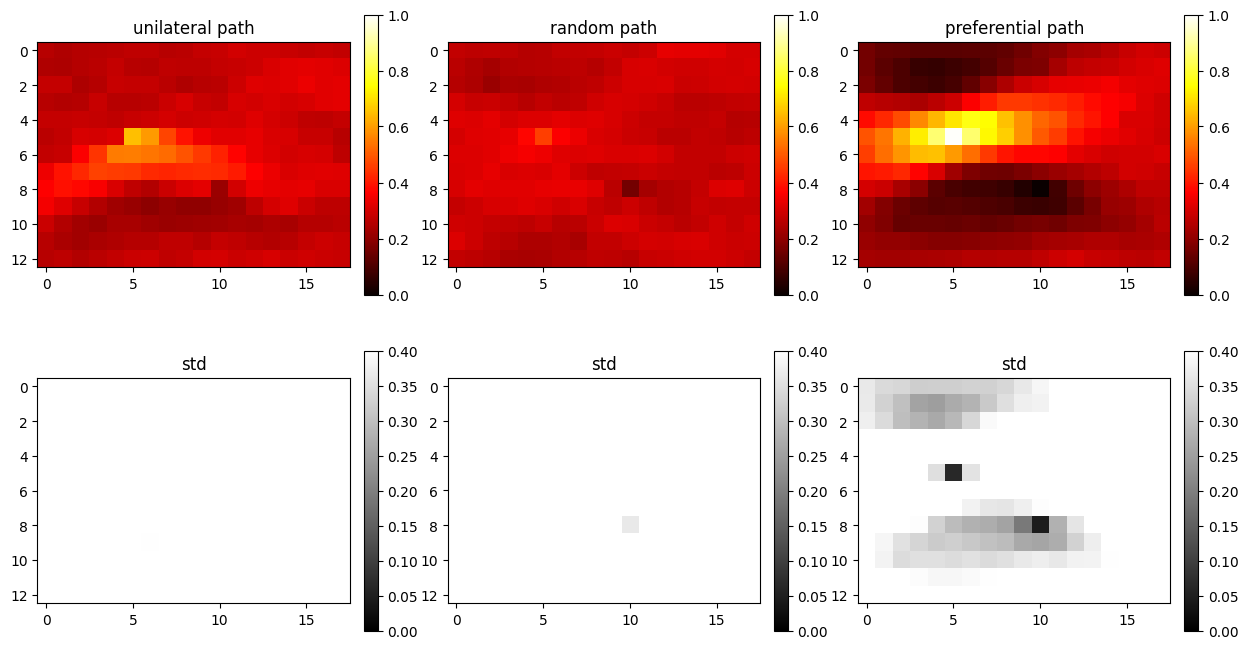

In [6]:

# Only co-locational
O.par['n_cond_soft']=1
O.par['max_search_radius_soft'] = 0

gtxt=['unilateral','random','preferential']
shuffle_simulation_grid_arr = [0,1,2]
fig = plt.figure(figsize=(15, 8))
for i in range(len(shuffle_simulation_grid_arr)):
    # Set preferential path
    O.par['shuffle_simulation_grid']=shuffle_simulation_grid_arr[i]

    O.delete_local_files()
    O.run_parallel()
    m_mean, m_std, m_mode=O.etype()
    
    plt.subplot(2,3,i+1)
    plt.imshow(m_mean.T, zorder=-1, vmin=0, vmax=1, cmap='hot')
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.title('%s path' % gtxt[i])
    plt.subplot(2,3,3+i+1)
    plt.imshow(m_std.T, zorder=-1, vmin=0, vmax=0.4, cmap='gray')
    plt.title('std')
    plt.colorbar(fraction=0.046, pad=0.04)
    
    

### Example 2: One non-co-locational soft data
In this example still only one soft data is used, however, it can be located at any location in tyhe simulation grid.

parallel: Using 25 of max 26 threads
parallel: Using 25 of max 26 threads
parallel: Using 25 of max 26 threads


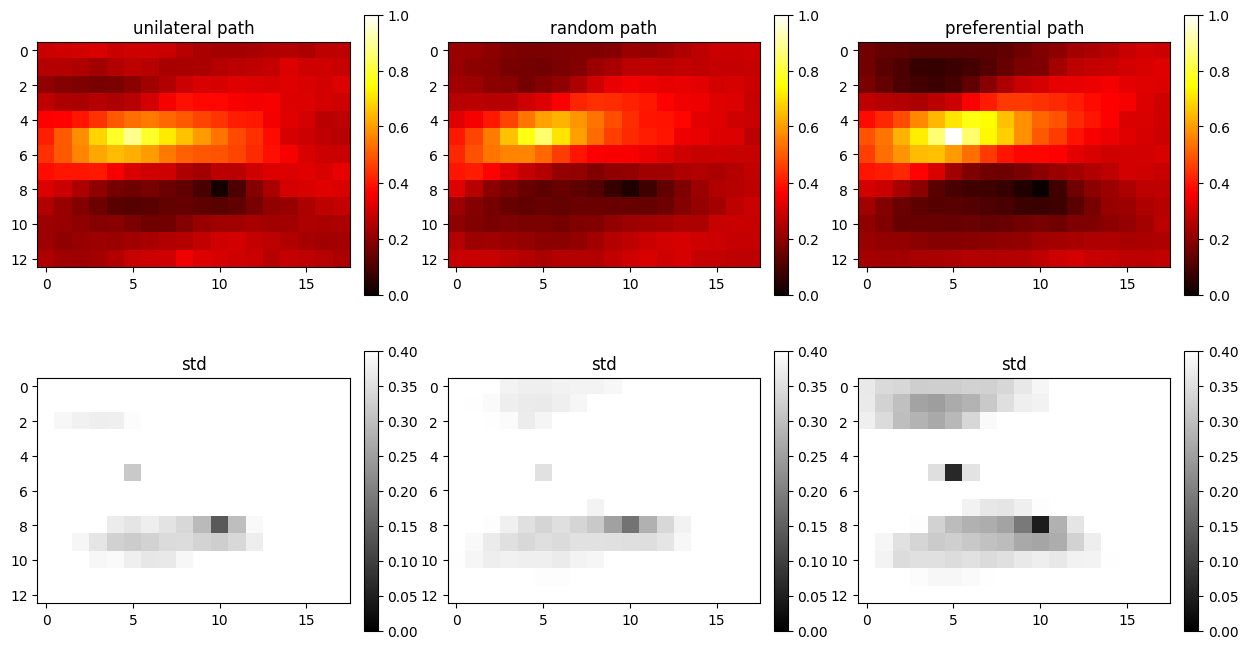

In [7]:
# Only 1 co-locational
O.par['n_cond_soft']=1
O.par['max_search_radius_soft'] = 1000000

shuffle_simulation_grid_arr = [0,1,2]
fig = plt.figure(figsize=(15, 8))
for i in range(len(shuffle_simulation_grid_arr)):
    # Set preferential path
    O.par['shuffle_simulation_grid']=shuffle_simulation_grid_arr[i]

    O.delete_local_files()
    O.run_parallel()
    m_mean, m_std, m_mode=O.etype()
    
    plt.subplot(2,3,i+1)
    plt.imshow(m_mean.T, zorder=-1, vmin=0, vmax=1, cmap='hot')
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.title('%s path' % gtxt[i])
    plt.subplot(2,3,3+i+1)
    plt.imshow(m_std.T, zorder=-1, vmin=0, vmax=0.4, cmap='gray')
    plt.title('std')
    plt.colorbar(fraction=0.046, pad=0.04)
    


### Example 3: 3 (all) non-co-locational soft data

parallel: Using 25 of max 26 threads
parallel: Using 25 of max 26 threads
parallel: Using 25 of max 26 threads


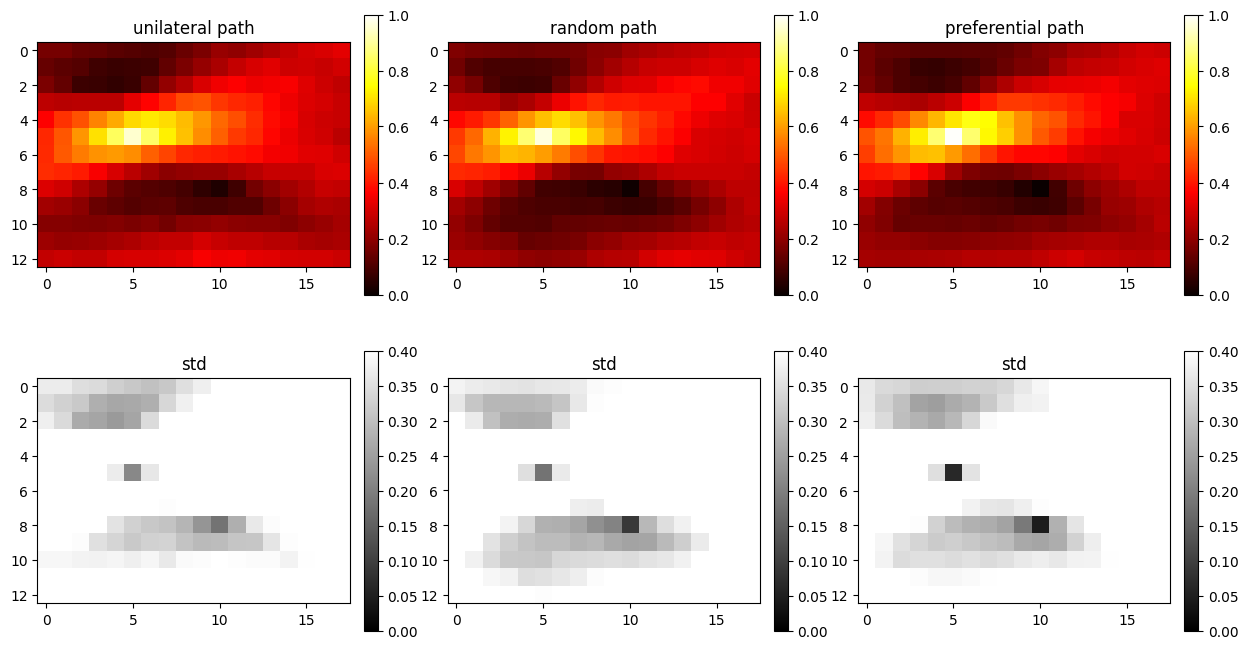

In [8]:
# Three co-locational
O.par['n_cond_soft']=3
O.par['max_search_radius_soft'] = 1000000

shuffle_simulation_grid_arr = [0,1,2]
fig = plt.figure(figsize=(15, 8))
for i in range(len(shuffle_simulation_grid_arr)):
    # Set preferential path
    O.par['shuffle_simulation_grid']=shuffle_simulation_grid_arr[i]

    O.delete_local_files()
    O.run_parallel()
    m_mean, m_std, m_mode=O.etype()
    
    plt.subplot(2,3,i+1)
    plt.imshow(m_mean.T, zorder=-1, vmin=0, vmax=1, cmap='hot')
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.title('%s path' % gtxt[i])
    plt.subplot(2,3,3+i+1)
    plt.imshow(m_std.T, zorder=-1, vmin=0, vmax=0.4, cmap='gray')
    plt.title('std')
    plt.colorbar(fraction=0.046, pad=0.04)
    
